In [1]:
!pip install deep_autoviml

In [2]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


Imported deep_auto_viml. version=0.0.68
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [3]:
BATCHSIZE = 256
CLASSES = 10
EPOCHS = 25
NUM_TRIALS = 5

In [4]:
datapath = './'
sep = ','
filename = 'train.csv'
df = pd.read_csv(datapath+filename,sep=sep)
target = 'label'
print(df.shape)
df.head(1)

(31962, 3)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...


In [5]:

df[target].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [6]:
keras_model_type =  "USE" ## always try "auto" first, then "basic", "deep", "BERT", "USE", cnn1", "LSTM" etc.
keras_options = {"early_stopping": True, 'epochs': 10, 'steps_per_epoch': 15, 'class_weight': True}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"storm", "max_trials":10, }

## always set the tuner to "storm" first and then "optuna"
#### You always need 15 max_trials to get something decent #####
trainfile = datapath+filename

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    epochs : 10
    steps_per_epoch : 15
    class_weight : True
    early_stopping : True
Using following model_options given as input:
    max_trials : 10
    tuner : storm
Max Trials : 10. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows > maxrows, loading a random sample of 10000 rows into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
Loaded a small data sample of size = (10000, 3) into pandas dataframe to analyze...
    Classifying 

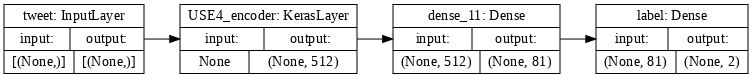


#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Training a USE model option...
    class_weights: {0: 1.0, 1: 7.256894049346879}
    original datasize = 31963, initial batchsize = 32
    recommended steps per epoch = 499
    recommended OneCycle steps = 9990
    default initializer = lecun_normal, default activation = selu
    Recommended: Increase patience for "onecycle" scheduler
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10.0
    number of epochs = 10, steps per epoch = 15

Splitting train into 80+20 percent: train and validation data
    Splitting validation 20 into 10+10 percent: valid and heldout data
    shuffle size = 31963
Model tr

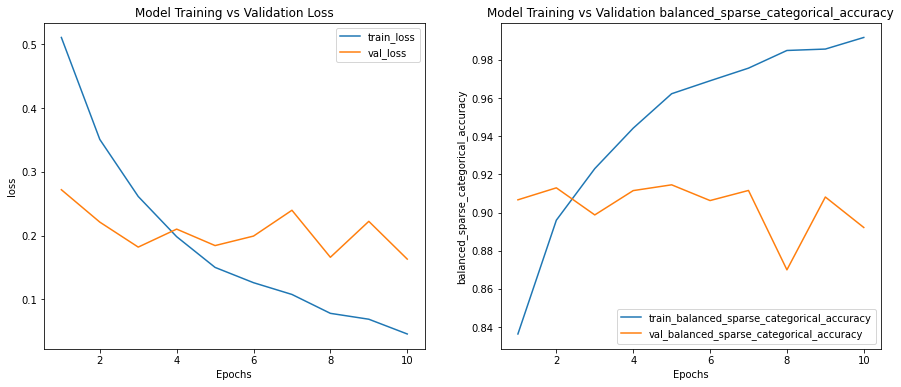


###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: label
#################################################################


    Accuracy          = 95.3%
    Balanced Accuracy = 88.3%
    Precision         = 61.9%
    Average Precision = 80.2%
    Recall            = 80.2%
    F1 Score          = 69.9%
    ROC AUC           = 96.9%
#####################################################

Training on full train dataset for 0 epochs. This will take time...
    completed. Time taken (in mins) = 0


TypeError: ignored

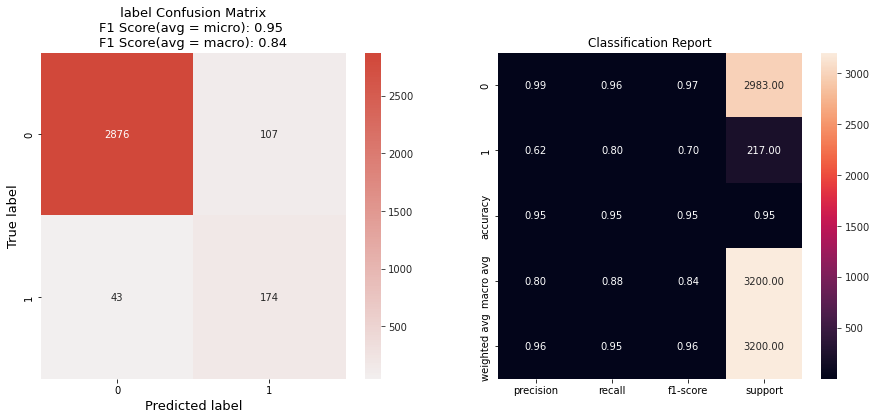

In [7]:
model, dicti = deepauto.fit(trainfile, target, keras_model_type=keras_model_type, 
                            project_name='churn_1',
                 save_model_flag=False, model_options=model_options,
                            keras_options=keras_options, use_my_model='', verbose=2)